### 03实现简单的线性回归法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1.,2.,3.,4.,5.])
y = np.array([1.,3.,2.,3.,5.])

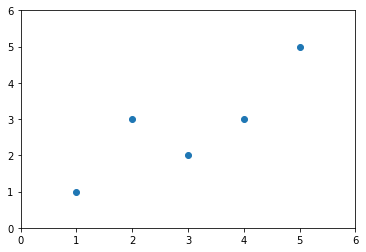

In [3]:
plt.scatter(x,y)
plt.axis([0,6,0,6]) #坐标值范围
plt.show()

### 求平均值

In [4]:
x_mean = np.mean(x)  # 所有x的平均值
y_mean = np.mean(y)  # 所有y的平均值

### 数学公式: 

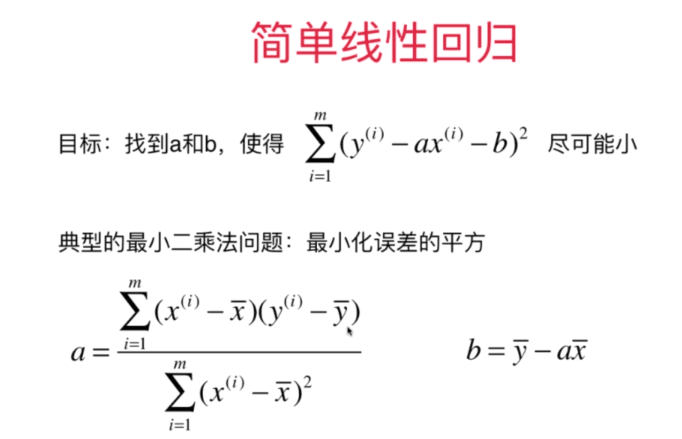

In [5]:
# 根据上面的公式
num = 0.0  #求分子的值
d = 0.0 #求分母的值
for x_i,y_i in zip(x,y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2
    

In [6]:
a = num/d
a

0.8

In [7]:
b = y_mean - a * x_mean
b

0.39999999999999947

In [8]:
y_hat = a*x + b

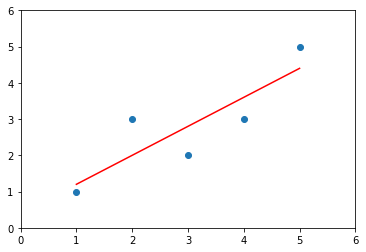

In [9]:
plt.scatter(x,y)
plt.plot(x,y_hat,color='r')  # 根据y_hat 画一条直线
plt.axis([0,6,0,6])
plt.show()

预测值

In [10]:
x_predict = 6
y_predict = a*x_predict + b
y_predict

5.2

### 模仿sklearn, 封装我们自己的SimpleLinearRegression
代码参见 [这里](playML/SimpleLinearRegression.py)

In [11]:
from playML.SimpleLinearRegression import SimpleLinearRegression1
reg1 = SimpleLinearRegression1()
reg1.fit(x,y)
reg1.predict(np.array([x_predict]))

array([5.2])

In [12]:
print(reg1.a_)
print(reg1.b_)


0.8
0.39999999999999947


In [13]:
y_hat1 = reg1.predict(x)
y_hat1

array([1.2, 2. , 2.8, 3.6, 4.4])

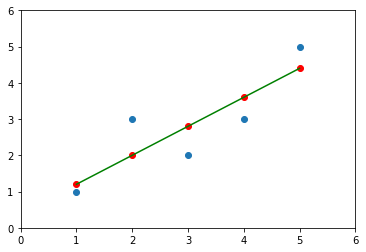

In [14]:
plt.scatter(x,y)
plt.scatter(x,y_hat1,color="r")
plt.plot(x,y_hat1,color="g")
plt.axis([0,6,0,6])
plt.show()

### 模仿sklearn,向量化实现SimpleLinearRegression
### 运算速度比foreach 快

代码参见 [这里](playML/SimpleLinearRegression.py)

In [15]:
from playML.SimpleLinearRegression import SimpleLinearRegression2

reg2 = SimpleLinearRegression2()
reg2.fit(x,y)
reg2.predict(np.array([x_predict]))

array([5.2])

In [16]:
print(reg2.a_,reg2.b_)

0.8 0.39999999999999947


### foreach与向量化实现的性能测试

In [17]:
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2 + 3 + np.random.normal(size=m)
%timeit reg1.fit(big_x,big_y)
%timeit reg2.fit(big_x,big_y)
print(reg1.a_,reg1.b_)
print(reg2.a_,reg2.b_)

707 ms ± 34.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.78 ms ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.9963643288218682 3.002147107887476
1.9963643288218267 3.002147107887497
